In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [211]:
# import data , units = mW/(m^2 nm)

columns = ['wavelength','DHI (direct)','DDHI (diffused)','reflected','uavg1','uavg2','uavg']

z1 = pd.read_csv(r'C:\Users\nadia\Desktop\report1\libRadtran data\1.out', delimiter=r"\s+", names=columns)
z10 = pd.read_csv(r'C:\Users\nadia\Desktop\report1\libRadtran data\10.out', delimiter=r"\s+", names=columns)
z20 = pd.read_csv(r'C:\Users\nadia\Desktop\report1\libRadtran data\20.out', delimiter=r"\s+", names=columns)
z40 = pd.read_csv(r'C:\Users\nadia\Desktop\report1\libRadtran data\40.out', delimiter=r"\s+", names=columns)
z60 = pd.read_csv(r'C:\Users\nadia\Desktop\report1\libRadtran data\60.out', delimiter=r"\s+", names=columns)
z80 = pd.read_csv(r'C:\Users\nadia\Desktop\report1\libRadtran data\80.out', delimiter=r"\s+", names=columns)

In [212]:
z1.head()

,wavelength,DHI (direct),DDHI (diffused),reflected,uavg1,uavg2,uavg
0,300.0,5.607888,3.984873,3.504307e-16,0.446329,0.59873,5.577277e-17
1,310.0,88.942160,65.203480,-1.206311e-14,7.078870,10.28558,-3.198261e-15
2,320.0,242.306200,159.796400,-1.972058e-14,19.285050,25.94566,-5.535622e-15
3,330.0,464.388900,269.910100,-1.184259e-13,36.960520,44.95897,-2.422810e-14
4,340.0,474.054500,233.244200,1.247416e-13,37.729800,39.65842,3.999814e-14


In [213]:
# actinic flux

for file in [z1, z10, z20, z40, z60, z80]:
    file['flux'] = file['uavg']*4*np.pi
    file['GHI (global)'] = file['DHI (direct)'] + file['DDHI (diffused)']

In [214]:
# import extraterrestrial data 

kurudz = pd.read_fwf(r'C:\Users\nadia\Desktop\MSc\Radiation and Atmosphere Interaction\report0\arxeia\kurudz_1.0nm.dat', delimiter='\t', header=None, encoding='latin1',sep='\t', skiprows = 11)

kurudz[0] = kurudz[0].str.strip()
kurudz[['wavelength','radiation']] = kurudz[0].str.split(' ', n=1, expand=True)
kurudz[['wavelength','radiation']] = kurudz[['wavelength','radiation']].astype(float)
kurudz = kurudz.drop(kurudz[kurudz.wavelength>4000].index)
kurudz = kurudz.drop(kurudz[kurudz.wavelength<290].index)
                     
kurudz = kurudz.reset_index(drop = True)

kurudz_new_wave = kurudz.groupby(kurudz.index//20)['wavelength'].mean().reset_index(drop=True)
kurudz_new_rad = kurudz.groupby(kurudz.index//20)['radiation'].mean().reset_index(drop=True)

In [215]:
z20.head()

,wavelength,DHI (direct),DDHI (diffused),reflected,uavg1,uavg2,uavg,flux,GHI (global)
0,300.0,3.953948,3.116686,-2.221641e-16,0.334838,0.470337,-8.365915e-17,-1.051292e-15,7.070634
1,310.0,74.286190,59.863070,-2.038131e-14,6.290894,9.502486,-5.658462e-15,-7.110633e-14,134.149260
2,320.0,211.068800,152.318700,2.707074e-14,17.874270,24.919530,8.303433e-15,1.043440e-13,363.387500
3,330.0,413.704500,262.246700,-5.621025e-13,35.034390,44.066710,-1.085605e-13,-1.364211e-12,675.951200
4,340.0,425.324900,227.535100,-1.046829e-13,36.018460,39.077330,-1.616946e-14,-2.031914e-13,652.860000


In [216]:
def plot(file, rad, ylabel, title,color):
    plt.plot(file['wavelength'], file[rad], markersize = 1, color=color)
    plt.xlabel("wavelegth (nm)",fontsize = 14)
    plt.ylabel(ylabel,fontsize = 14)
    plt.title(label=title,fontsize = 15)
    plt.grid()

### Figures of direct, diffused and global radiation

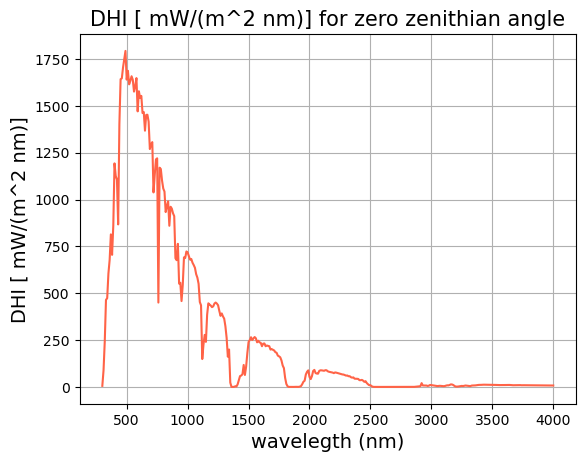

In [217]:
# plotting the dirrect, diffuse and global irradiances for z=0

plot(z1, 'DHI (direct)', "DHI [ mW/(m^2 nm)]", "DHI [ mW/(m^2 nm)] for zero zenithian angle",'tomato')

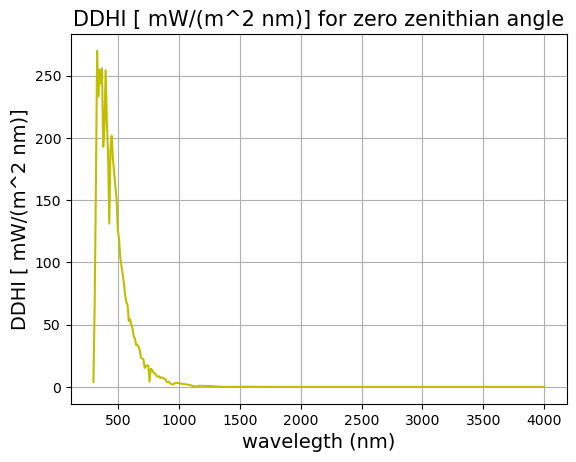

In [218]:
plot(z1, 'DDHI (diffused)', "DDHI [ mW/(m^2 nm)]", "DDHI [ mW/(m^2 nm)] for zero zenithian angle",'y')

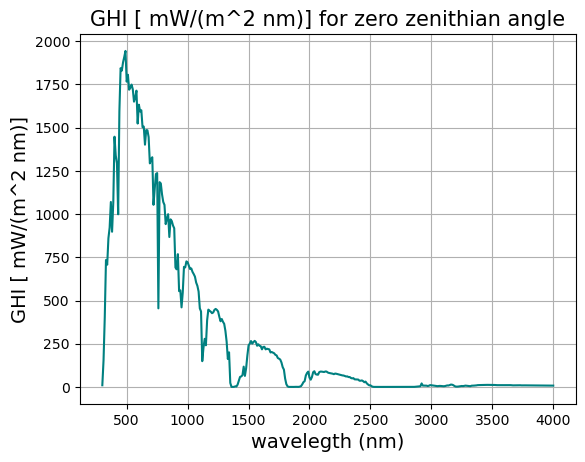

In [219]:
plot(z1, 'GHI (global)', "GHI [ mW/(m^2 nm)]", "GHI [ mW/(m^2 nm)] for zero zenithian angle",'teal')

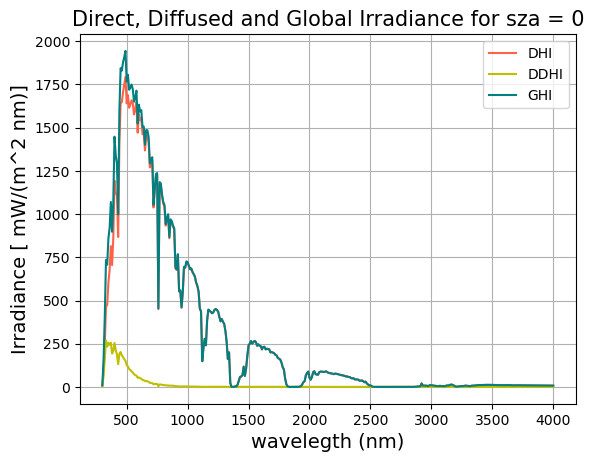

In [220]:
#combined plot for fun
plt.plot(z1['wavelength'], z1['DHI (direct)'], markersize = 1, color ='tomato')
plt.plot(z1['wavelength'], z1['DDHI (diffused)'], markersize = 1, color = 'y')
plt.plot(z1['wavelength'], z1['GHI (global)'], markersize = 1, color = 'teal')
plt.xlabel("wavelegth (nm)",fontsize = 14)
plt.ylabel("Irradiance [ mW/(m^2 nm)]",fontsize = 14)
plt.title(label="Direct, Diffused and Global Irradiance for sza = 0",fontsize = 15)
plt.legend(['DHI', 'DDHI', 'GHI'])
plt.grid()

### Figure of global and extraterrestrial radiation

In [221]:
# plotting function for kurudz 
def waverad(wave,rad,color):
    plt.plot(wave, rad, color=color, markersize = 1)
    plt.xlabel("wavelength (nm)")
    plt.ylabel("radiation(mW/(m2*nm)")

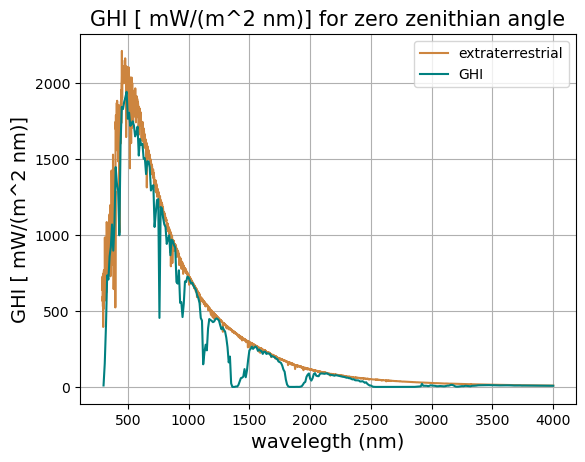

In [222]:
waverad(kurudz['wavelength'],kurudz['radiation'],'peru')
plot(z1, 'GHI (global)', "GHI [ mW/(m^2 nm)]", "GHI [ mW/(m^2 nm)] for zero zenithian angle",'teal')
plt.legend(['extraterrestrial','GHI'])

### Integration and sums of SW, UVB, UVA, VIS and IR for the global irradiance for sza = 0

In [223]:
z1.iloc[2:11]

,wavelength,DHI (direct),DDHI (diffused),reflected,uavg1,uavg2,uavg,flux,GHI (global)
2,320.0,242.3062,159.7964,-1.972058e-14,19.28505,25.94566,-5.535622e-15,-6.956268e-14,402.1026
3,330.0,464.3889,269.9101,-1.184259e-13,36.96052,44.95897,-2.422810e-14,-3.044593e-13,734.2990
4,340.0,474.0545,233.2442,1.247416e-13,37.72980,39.65842,3.999814e-14,5.026315e-13,707.2987
5,350.0,605.4393,254.9187,-6.113116e-13,48.18667,44.20357,-1.007137e-13,-1.265606e-12,860.3580
6,360.0,677.5215,243.9158,-2.747803e-14,53.92366,42.93015,-1.034725e-14,-1.300274e-13,921.4373
7,370.0,814.2499,255.8773,9.391321e-14,64.80582,45.90419,1.629036e-14,2.047107e-13,1070.1272
8,380.0,705.0940,192.8159,1.020991e-13,56.11814,35.04112,-1.917307e-14,-2.409359e-13,897.9099
9,390.0,860.9861,207.6654,-1.412816e-12,68.52554,38.31409,-3.188241e-13,-4.006462e-12,1068.6515
10,400.0,1193.4310,254.3815,3.939407e-12,94.98470,47.49994,9.886539e-13,1.242379e-11,1447.8125


In [224]:
# sums 
SW = np.trapz(z1['GHI (global)'],z1['wavelength']).round(2) # 290-4000 nm 
UVB = np.trapz(z1['GHI (global)'].iloc[0:2],z1['wavelength'].iloc[0:2]).round(2) # 290-320 nm 
UVA = np.trapz(z1['GHI (global)'].iloc[2:11],z1['wavelength'].iloc[2:11]).round(2) # 320-400 nm
VIS = np.trapz(z1['GHI (global)'].iloc[11:41],z1['wavelength'].iloc[11:41]).round(2) # 400-700 nm
IR = np.trapz(z1['GHI (global)'].iloc[41:371],z1['wavelength'].iloc[41:371]).round(2) # 700-4000 nm

In [225]:
# sum of global for 1 degree -> 1091597.13
SW

1091597.13

In [226]:
print("For sza=0, the irradiation sums are: SW = " + str(SW) + " nm, UVB = " + str(UVB) + " nm, UVA = " + str(UVA) + " nm, VIS = " + str(VIS) + " nm, IR = "+ str(VIS) + "nm")

For sza=0, the irradiation sums are: SW = 1091597.13 nm, UVB = 818.69 nm, UVA = 71850.39 nm, VIS = 466295.96 nm, IR = 466295.96nm


## Code Part 2

### we have 5 different wavelengths and 3 different radiations

In [227]:
def SW(df):
    glb_sw_sza = np.trapz(df['GHI (global)'],df['wavelength']).round(2)
    dir_sw_sza = np.trapz(df['DHI (direct)'],df['wavelength']).round(2)
    dif_sw_sza = np.trapz(df['DDHI (diffused)'],df['wavelength']).round(2)
    dir_glb_sw_sza = (dir_sw_sza /glb_sw_sza).round(2)
    dif_glb_sw_sza = (dif_sw_sza /glb_sw_sza).round(2) 
    sw = [glb_sw_sza, dir_sw_sza, dif_sw_sza, dir_glb_sw_sza, dif_glb_sw_sza ]
    return sw

In [228]:
def UVB(df): 
    glb_uvb_sza = np.trapz(df['GHI (global)'].iloc[0:2],df['wavelength'].iloc[0:2]).round(2)
    dir_uvb_sza = np.trapz(df['DHI (direct)'].iloc[0:2],df['wavelength'].iloc[0:2]).round(2)
    dif_uvb_sza = np.trapz(df['DDHI (diffused)'].iloc[0:2],df['wavelength'].iloc[0:2]).round(2)
    dir_glb_uvb_sza = (dir_uvb_sza /glb_uvb_sza).round(2)
    dif_glb_uvb_sza = (dif_uvb_sza /glb_uvb_sza).round(2) 
    uvb = [glb_uvb_sza, dir_uvb_sza, dif_uvb_sza, dir_glb_uvb_sza, dif_glb_uvb_sza ]
    return uvb

In [229]:
def UVA(df):
    glb_uva_sza = np.trapz(df['GHI (global)'].iloc[2:11],df['wavelength'].iloc[2:11]).round(2)
    dir_uva_sza = np.trapz(df['DHI (direct)'].iloc[2:11],df['wavelength'].iloc[2:11]).round(2)
    dif_uva_sza = np.trapz(df['DDHI (diffused)'].iloc[2:11],df['wavelength'].iloc[2:11]).round(2)
    dir_glb_uva_sza = (dir_uva_sza /glb_uva_sza).round(2)
    dif_glb_uva_sza = (dif_uva_sza /glb_uva_sza).round(2) 
    uva = [glb_uva_sza, dir_uva_sza, dif_uva_sza, dir_glb_uva_sza, dif_glb_uva_sza ]
    return uva

In [230]:
def VIS(df):
    glb_vis_sza = np.trapz(df['GHI (global)'].iloc[11:41],df['wavelength'].iloc[11:41]).round(2) 
    dir_vis_sza = np.trapz(df['DHI (direct)'].iloc[11:41],df['wavelength'].iloc[11:41]).round(2) 
    dif_vis_sza = np.trapz(df['DDHI (diffused)'].iloc[11:41],df['wavelength'].iloc[11:41]).round(2) 
    dir_glb_vis_sza = (dir_vis_sza /glb_vis_sza).round(2)
    dif_glb_vis_sza = (dif_vis_sza /glb_vis_sza).round(2) 
    vis = [glb_vis_sza, dir_vis_sza, dif_vis_sza, dir_glb_vis_sza, dif_glb_vis_sza ]
    return vis

In [231]:
def IR(df):
    glb_ir_sza = np.trapz(df['GHI (global)'].iloc[41:371],df['wavelength'].iloc[41:371]).round(2)
    dir_ir_sza = np.trapz(df['DHI (direct)'].iloc[41:371],df['wavelength'].iloc[41:371]).round(2)
    dif_ir_sza = np.trapz(df['DDHI (diffused)'].iloc[41:371],df['wavelength'].iloc[41:371]).round(2)
    dir_glb_ir_sza = (dir_ir_sza /glb_ir_sza).round(2)
    dif_glb_ir_sza = (dif_ir_sza /glb_ir_sza).round(2) 
    ir = [glb_ir_sza, dir_ir_sza, dif_ir_sza, dir_glb_ir_sza, dif_glb_ir_sza ]
    return ir

In [232]:
szas = (0, 10, 20, 40, 60, 80)

In [233]:
# SW data

z1sw = SW(z1)
z10sw = SW(z10)
z20sw = SW(z20)
z40sw = SW(z40)
z60sw = SW(z60)
z80sw = SW(z80)

In [234]:
# UVB data

z1uvb = UVB(z1)
z10uvb = UVB(z10)
z20uvb = UVB(z20)
z40uvb = UVB(z40)
z60uvb = UVB(z60)
z80uvb = UVB(z80)

In [235]:
# UVA data

z1uva = UVA(z1)
z10uva = UVA(z10)
z20uva = UVA(z20)
z40uva = UVA(z40)
z60uva = UVA(z60)
z80uva = UVA(z80)

In [236]:
# VIS data

z1vis = VIS(z1)
z10vis = VIS(z10)
z20vis = VIS(z20)
z40vis = VIS(z40)
z60vis = VIS(z60)
z80vis = VIS(z80)

In [237]:
# IR data

z1ir = IR(z1)
z10ir = IR(z10)
z20ir = IR(z20)
z40ir = IR(z40)
z60ir = IR(z60)
z80ir = IR(z80)

In [238]:
# SW data to plot

glb_sw = (z1sw[0], z10sw[0], z20sw[0], z40sw[0], z60sw[0], z80sw[0])
dir_sw = (z1sw[1], z10sw[1], z20sw[1], z40sw[1], z60sw[1], z80sw[1])
dif_sw = (z1sw[2], z10sw[2], z20sw[2], z40sw[2], z60sw[2], z80sw[2])
dir_glb_sw = (z1sw[3], z10sw[3], z20sw[3], z40sw[3], z60sw[3], z80sw[3])
dif_glb_sw = (z1sw[4], z10sw[4], z20sw[4], z40sw[4], z60sw[4], z80sw[4])

In [239]:
# UVB data to plot

glb_uvb = (z1uvb[0], z10uvb[0], z20uvb[0], z40uvb[0], z60uvb[0], z80uvb[0])
dir_uvb = (z1uvb[1], z10uvb[1], z20uvb[1], z40uvb[1], z60uvb[1], z80uvb[1])
dif_uvb = (z1uvb[2], z10uvb[2], z20uvb[2], z40uvb[2], z60uvb[2], z80uvb[2])
dir_glb_uvb = (z1uvb[3], z10uvb[3], z20uvb[3], z40uvb[3], z60uvb[3], z80uvb[3])
dif_glb_uvb = (z1uvb[4], z10uvb[4], z20uvb[4], z40uvb[4], z60uvb[4], z80uvb[4])

In [240]:
# UVA data to plot

glb_uva = (z1uva[0], z10uva[0], z20uva[0], z40uva[0], z60uva[0], z80uva[0])
dir_uva = (z1uva[1], z10uva[1], z20uva[1], z40uva[1], z60uva[1], z80uva[1])
dif_uva = (z1uva[2], z10uva[2], z20uva[2], z40uva[2], z60uva[2], z80uva[2])
dir_glb_uva = (z1uva[3], z10uva[3], z20uva[3], z40uva[3], z60uva[3], z80uva[3])
dif_glb_uva = (z1uva[4], z10uva[4], z20uva[4], z40uva[4], z60uva[4], z80uva[4])

In [241]:
# VIS data to plot

glb_vis = (z1vis[0], z10vis[0], z20vis[0], z40vis[0], z60vis[0], z80vis[0])
dir_vis = (z1vis[1], z10vis[1], z20vis[1], z40vis[1], z60vis[1], z80vis[1])
dif_vis = (z1vis[2], z10vis[2], z20vis[2], z40vis[2], z60vis[2], z80vis[2])
dir_glb_vis = (z1vis[3], z10vis[3], z20vis[3], z40vis[3], z60vis[3], z80vis[3])
dif_glb_vis = (z1vis[4], z10vis[4], z20vis[4], z40vis[4], z60vis[4], z80vis[4])

In [242]:
# IR data to plot

glb_ir = (z1ir[0], z10ir[0], z20ir[0], z40ir[0], z60ir[0], z80ir[0])
dir_ir = (z1ir[1], z10ir[1], z20ir[1], z40ir[1], z60ir[1], z80ir[1])
dif_ir = (z1ir[2], z10ir[2], z20ir[2], z40ir[2], z60ir[2], z80ir[2])
dir_glb_ir = (z1ir[3], z10ir[3], z20ir[3], z40ir[3], z60ir[3], z80ir[3])
dif_glb_ir = (z1ir[4], z10ir[4], z20ir[4], z40ir[4], z60ir[4], z80ir[4])

In [243]:
def ratios(dir_glb,dif_glb,title):
    plt.plot(szas,dir_glb_uvb, label = 'dir_glb')
    plt.plot(szas,dif_glb_uvb, label = 'dif_glb')
    plt.legend()
    plt.xlabel('sza (°)', fontsize = 14)
    plt.ylabel('irradiance ratios', fontsize = 14)
    plt.title(label=title, fontsize = 15)
    plt.grid()

In [250]:
def irradiances(direct ,dif, glb, title):
    plt.plot(szas, direct, label = 'DHI')
    plt.plot(szas, dif, label = 'DDHI')
    plt.plot(szas, glb, label = 'GHI')
    plt.legend()
    plt.xlabel('sza (°)', fontsize = 14)
    plt.ylabel('irradiances [mW/(m^2 nm)] ', fontsize = 14)
    plt.title(label=title, fontsize = 15)
    plt.grid()

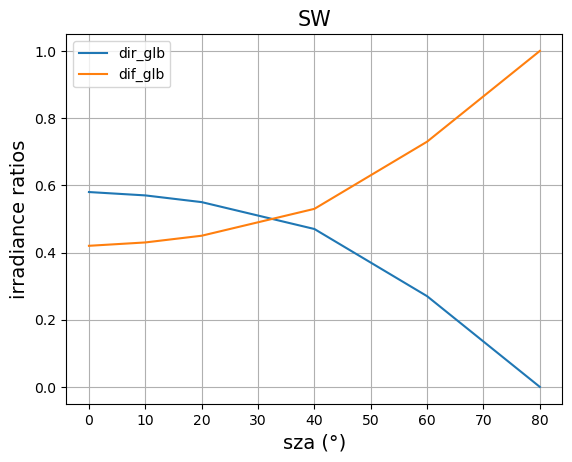

In [252]:
ratios(dir_glb_sw, dif_glb_sw, 'SW')

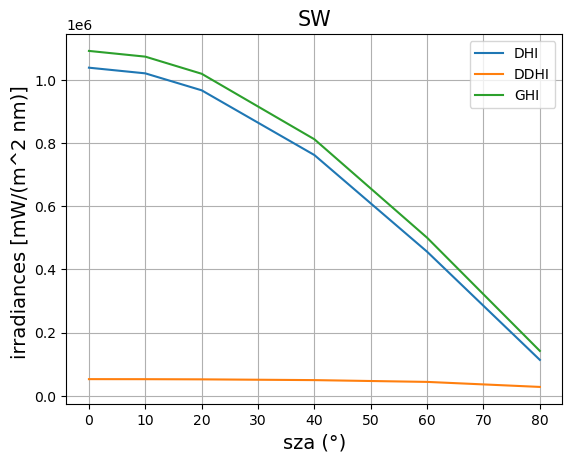

In [253]:
irradiances(dir_sw ,dif_sw, glb_sw, 'SW')

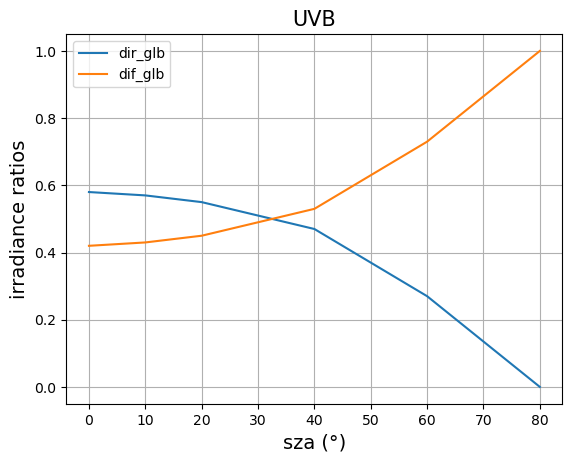

In [245]:
ratios(dir_glb_uvb, dif_glb_uvb, 'UVB')

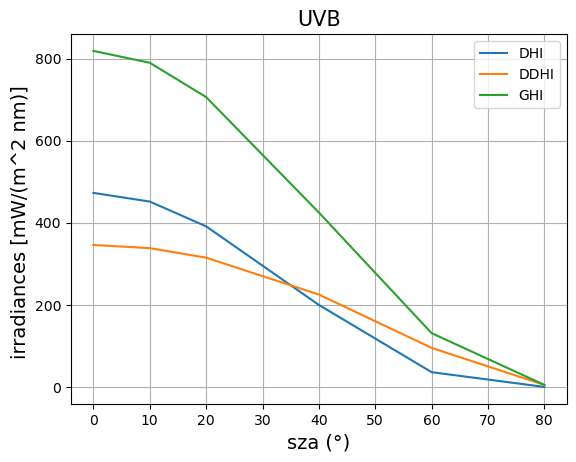

In [254]:
irradiances(dir_uvb ,dif_uvb, glb_uvb, 'UVB')

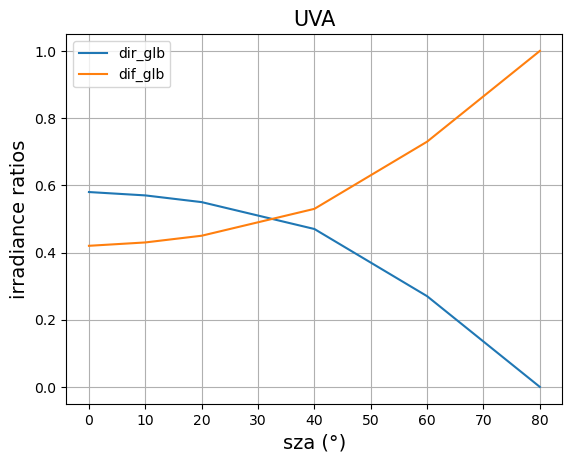

In [246]:
ratios(dir_glb_uva, dif_glb_uva, 'UVA')

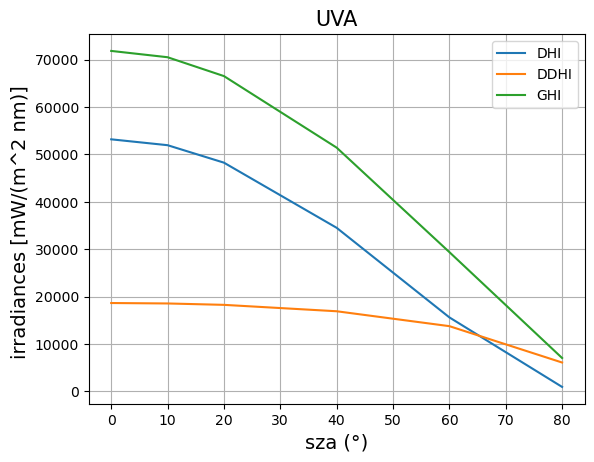

In [255]:
irradiances(dir_uva ,dif_uva, glb_uva, 'UVA')

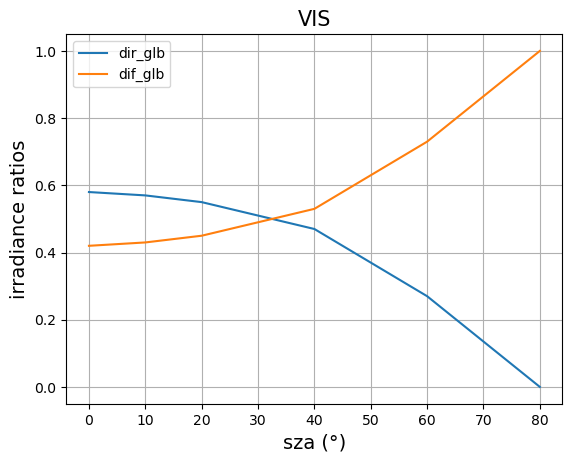

In [247]:
ratios(dir_glb_vis, dif_glb_vis, 'VIS')

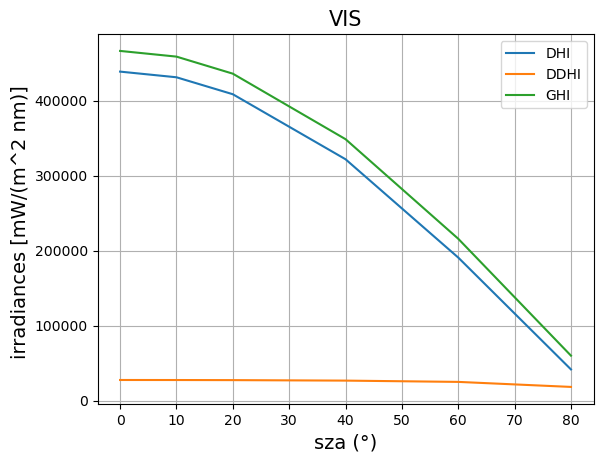

In [256]:
irradiances(dir_vis ,dif_vis, glb_vis, 'VIS')

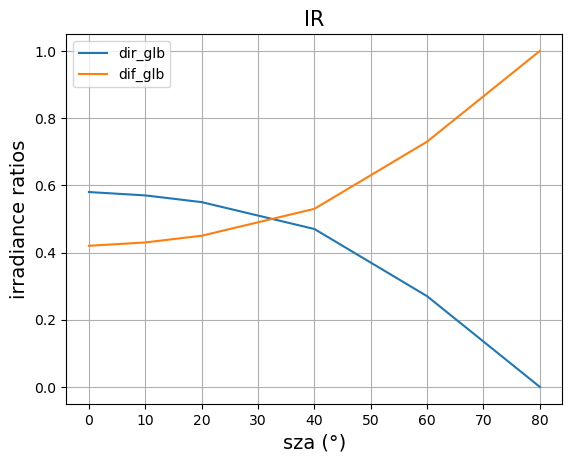

In [248]:
ratios(dir_glb_ir, dif_glb_ir, 'IR')

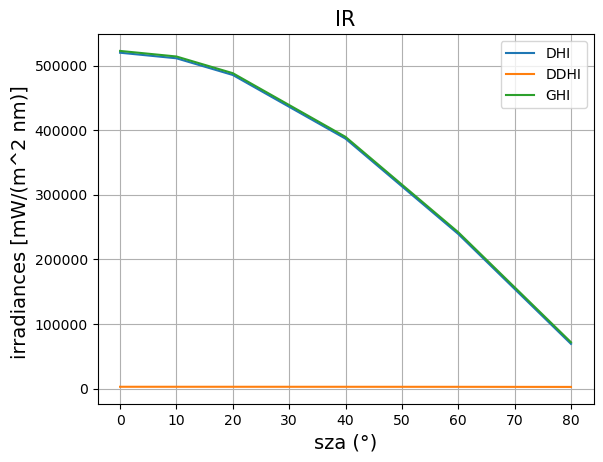

In [257]:
irradiances(dir_ir ,dif_ir, glb_ir, 'IR')

In [249]:
print(dir_glb_sw,dir_glb_uvb, dir_glb_uva ,dir_glb_vis,dir_glb_ir)

(0.95, 0.95, 0.95, 0.94, 0.91, 0.8) (0.58, 0.57, 0.55, 0.47, 0.27, 0.0) (0.74, 0.74, 0.73, 0.67, 0.53, 0.13) (0.94, 0.94, 0.94, 0.92, 0.88, 0.69) (0.99, 0.99, 0.99, 0.99, 0.99, 0.96)
